+ ### Draw anomaly score according to time

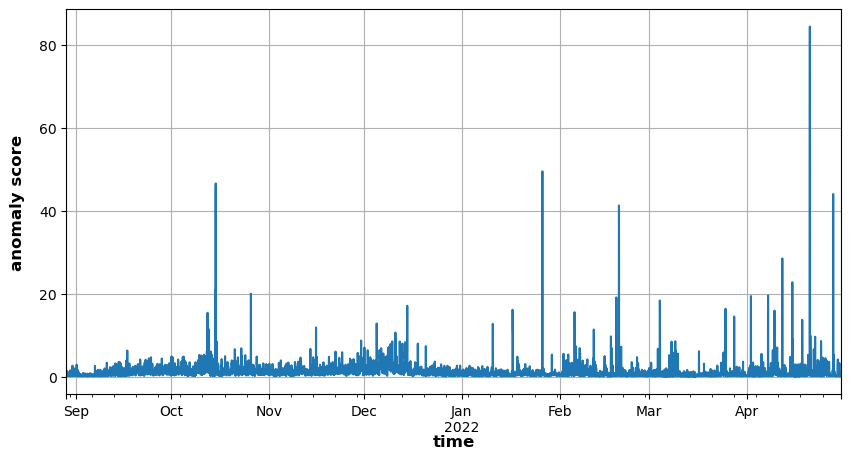

In [7]:
import numpy as np
import pandas as pd

score = np.load('anomaly_score.npy')
x = pd.date_range('2021-08-29 0:00', periods=5880, freq='H').to_pydatetime().tolist()

anomaly = pd.DataFrame({'score' : score}, index=x)
axes = anomaly.plot(figsize=(10,5), grid=True, legend=None)

axes.set_title("")
# Set x-axis label
axes.set_xlabel("time", labelpad=0, weight='bold', size=12)

# Set y-axis label
axes.set_ylabel("anomaly score", labelpad=10, weight='bold', size=12)

axes.figure.savefig('anomaly score_paper.png', dpi=600)



+ ### Draw histogram of anomaly score

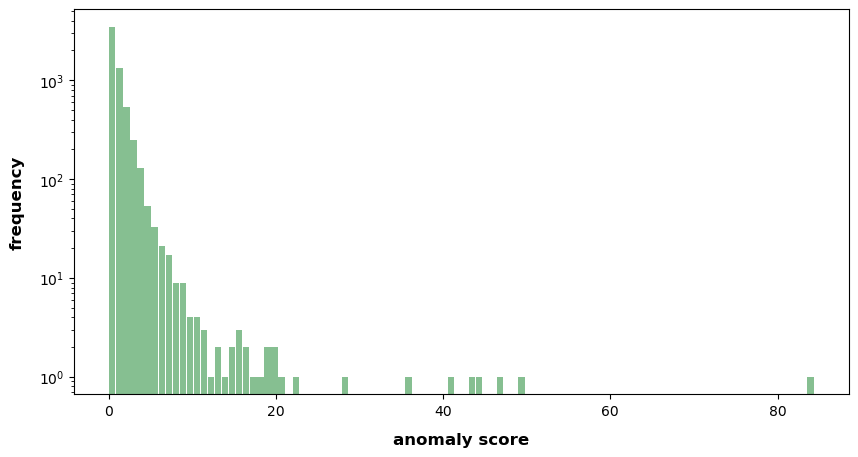

In [8]:
ax = anomaly.hist(column='score', bins=100, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9, log=True)

ax = ax[0]
for x in ax:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("anomaly score", labelpad=10, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("frequency", labelpad=10, weight='bold', size=12)
    
    x.figure.savefig('histogram.png', dpi=900)


+ ### Show largest anomaly scores

In [9]:
anomaly.nlargest(10, columns='score')

,score
2022-04-21 00:00:00,84.368657
2022-01-26 11:00:00,49.475588
2021-10-15 05:00:00,46.548081
2022-04-28 09:00:00,44.001791
2021-10-15 04:00:00,43.807227
2022-02-19 16:00:00,41.236892
2022-04-20 23:00:00,35.553669
2022-04-12 07:00:00,28.478016
2022-04-15 11:00:00,22.739280
2021-10-15 01:00:00,20.815986


+ ### Get 0.999-quantile (base for deciding threshold value)

In [10]:
anomaly.quantile(0.999, interpolation='nearest')

score    35.553669
Name: 0.999, dtype: float64